<div class="alert alert-block alert-success">
<b>Imported libraries</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pmdarima as pmd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from fredapi import Fred
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew, kurtosis, shapiro
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fred = Fred(api_key = '933bf44f3379eae22b9f6e0340a6e67c')
sns.set_style('white')

<div class="alert alert-block alert-info">
<b>Load the data, set index and info about data</b>
</div>

In [2]:
# Population(Not Seasonally Adjusted)
pop = fred.get_series('POPTHM')
pop.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01'],
              dtype='datetime64[ns]', length=747, freq=None)

<div class="alert alert-block alert-info">
<b>Time series range</b>
</div>

In [3]:
date_real = pd.date_range(start = '1959-01-01', end = '2019-12-01', freq = 'MS')
pop = pop[date_real]

<div class="alert alert-block alert-info">
<b>Data Frame Online or Offline
</div>

In [4]:
p = int(input('0 for Online and anything else for Offline: '))

if p == 0:
    df = pd.DataFrame(pop)
    df.rename(columns = {0: 'value'}, inplace = True)
    df.index.name = 'date'
    df.sort_index(inplace = True)
    df.info()
else:
    df = pd.read_csv('POPTHM.csv')
    df.rename(columns = {'POPTHM': 'value', 'DATE': 'date'}, inplace = True)
    df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
    # Return an Index of formatted datetime strings
    # df['date'] = df['date'].dt.strftime('%Y/%m/%d')
    df.set_index('date', inplace = True)
    df.sort_index(inplace = True)
    # remove 2020-01
    df.drop(df.tail(1).index, inplace = True)
    df.info()

0 for Online and anything else for Offline: 0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 1959-01-01 to 2019-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   732 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


<div class="alert alert-block alert-info">
<b>Plot original time series</b>
</div>

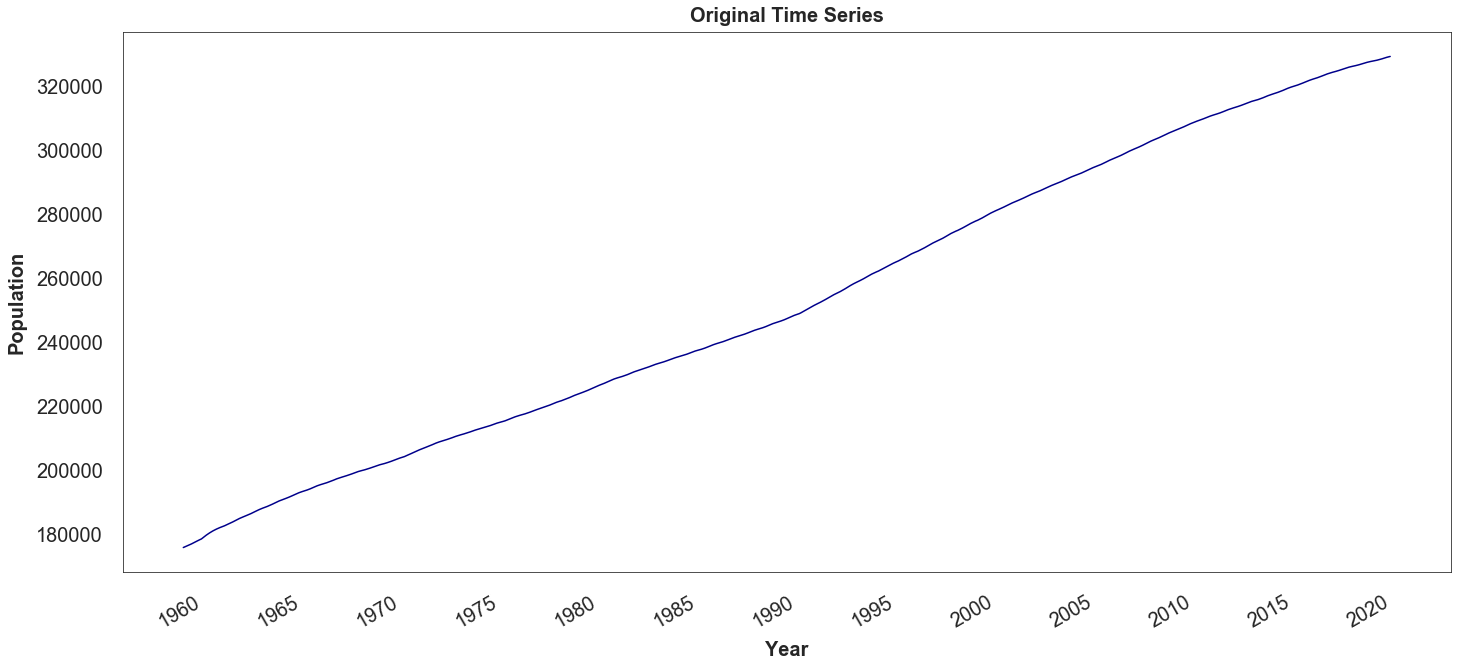

In [5]:
plt.figure(figsize = (20,10))
plt.title('Original Time Series', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                
plt.tight_layout()                                               
plt.plot(df.index, df['value'], color = 'darkblue')
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5)) 
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

<div class="alert alert-block alert-info">
<b>Pick a year to plot</b>
</div>

Type the year you want to plot from 1959 to 2019: 2000


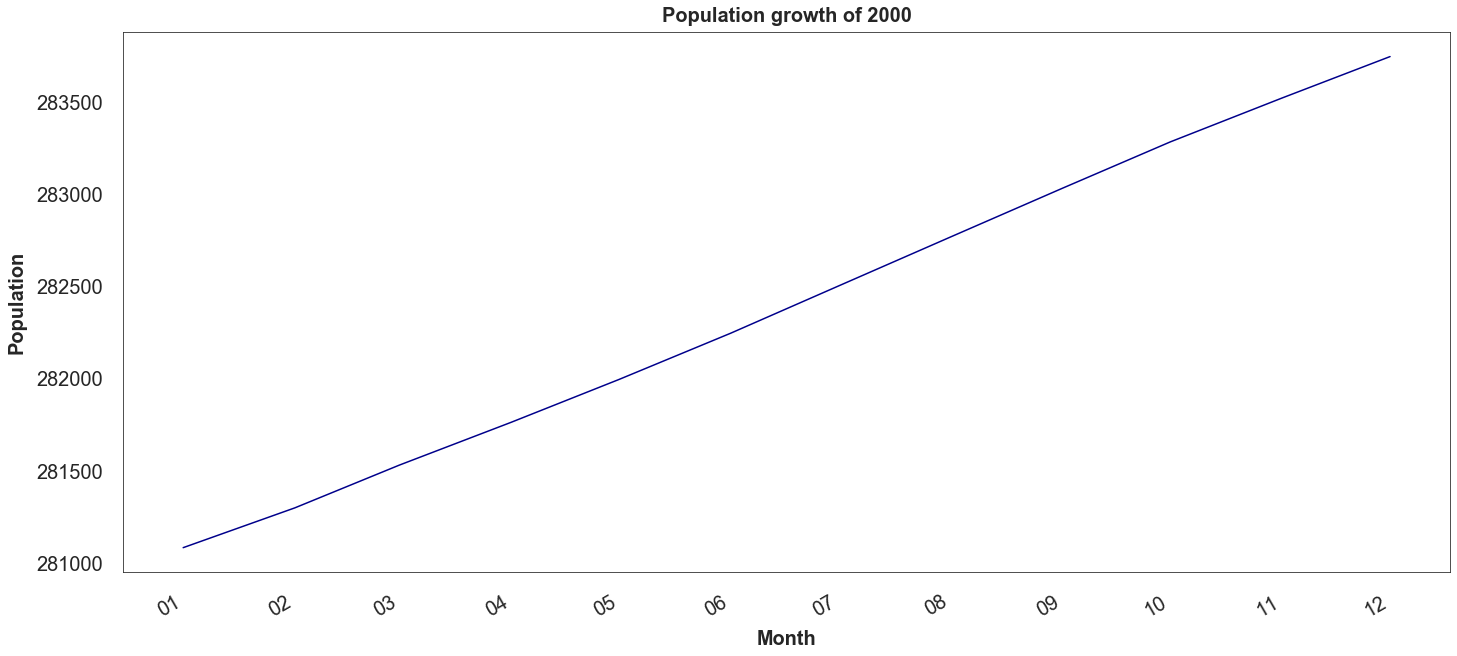

In [6]:
year = int(input('Type the year you want to plot from 1959 to 2019: '))
if year > 1958 and year < 2020:
    plt.figure(figsize = (20,10))
    plt.title('Population growth of %.0f' % year, weight = 'bold', fontsize = 20, pad = 10)
    plt.xlabel('Month', weight = 'bold', fontsize = 20, labelpad = 10)
    plt.ylabel('Population', weight = 'bold', fontsize = 20,  labelpad = 10)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 10, size = 10)                                
    plt.tight_layout()                                                                                                                                  
    dfyear1 = df[df.index.year == year]
    plt.plot(dfyear1.index, dfyear1['value'],color = 'darkblue')
    plt.gcf().autofmt_xdate()
    date_format = mdates.DateFormatter('%m')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 1)) 
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()
else:
    print('Run again and type a valid year')

<div class="alert alert-block alert-info">
<b>Pick multiple years to plot</b>
</div>

Type the year you wanna start from 1959 to 2018: 2010
Type the year you wanna stop from 1960 to 2019: 2019


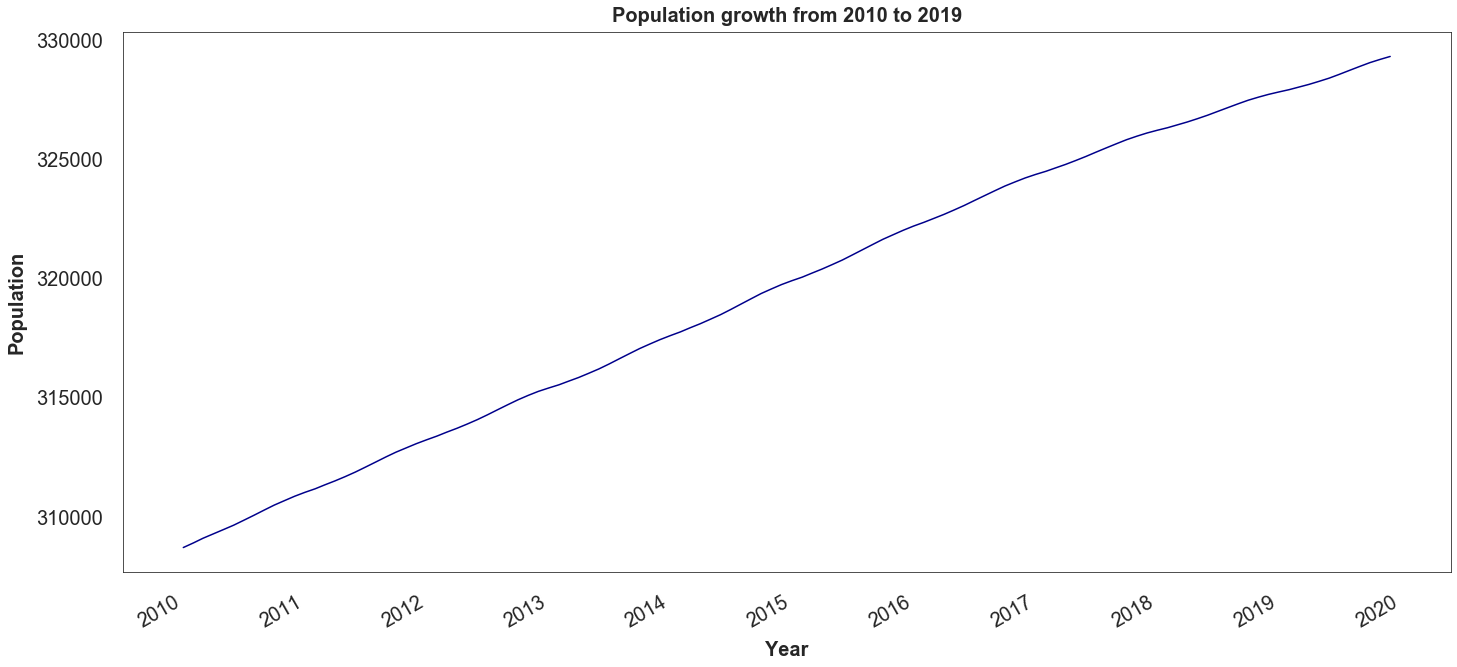

In [7]:
year_s = int(input('Type the year you wanna start from 1959 to 2018: '))
year_p = int(input('Type the year you wanna stop from 1960 to 2019: '))
if year_s > 1958 and year_s < year_p and year_p > year_s and year_p < 2020:
    plt.figure(figsize = (20,10))
    plt.title('Population growth from %.0f to %.0d' % (year_s, year_p), weight = 'bold', fontsize = 20, pad = 10)
    plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
    plt.ylabel('Population', weight = 'bold', fontsize = 20, labelpad = 10)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
    plt.tight_layout()                                               
    dfyear2 = df[(df.index.year >= year_s) & (df.index.year <= year_p)]
    plt.plot(dfyear2.index, dfyear2['value'], color = 'darkblue')
    plt.gcf().autofmt_xdate()
    date_format = mdates.DateFormatter('%Y')
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1)) 
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()
else:
    print('Run again and type a valid year(s)')

<div class="alert alert-block alert-info">
<b>% Change in population growth</b>
</div>

In [8]:
pct_fix = df['value'].pct_change().dropna()

<div class="alert alert-block alert-info">
<b>Kolmogorov-Smirnov Test</b>
</div>

In [9]:
%%capture --no-stdout

list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr',
                 'burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang',
                 'expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk',
                 'foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto',
                 'gennorm','genexpon','genextreme','gausshyper','gamma','gengamma',
                 'genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy',
                 'halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss',
                 'invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l',
                 'logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke',
                 'nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw',
                 'powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice',
                 'recipinvgauss','semicircular','t','triang','truncexpon','truncnorm',
                 'tukeylambda','uniform','vonmises','vonmises_line','wald',
                 'weibull_min','weibull_max']
    
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df['value'])
    a = stats.kstest(df['value'], i, args = param)
    results.append((i, a[0], a[1]))
    
results.sort(key = lambda x:float(x[2]), reverse = True)
for j in results:
    if j[2] > 0.9:
        print("{}: statistic = {}, pvalue = {}".format(j[0], j[1], j[2]))

<div class="alert alert-block alert-info">
<b>Generalized Logistic Distribution Q-Q plot</b>
</div>

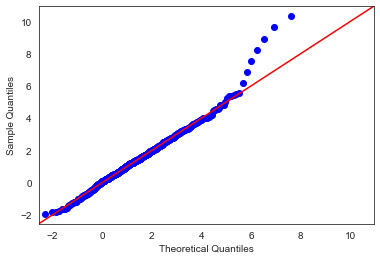

In [10]:
sm.qqplot(pct_fix, stats.genlogistic, fit = True, line = '45') 
plt.show()

<div class="alert alert-block alert-info">
<b>Probability density function (PDF)</b>
</div>

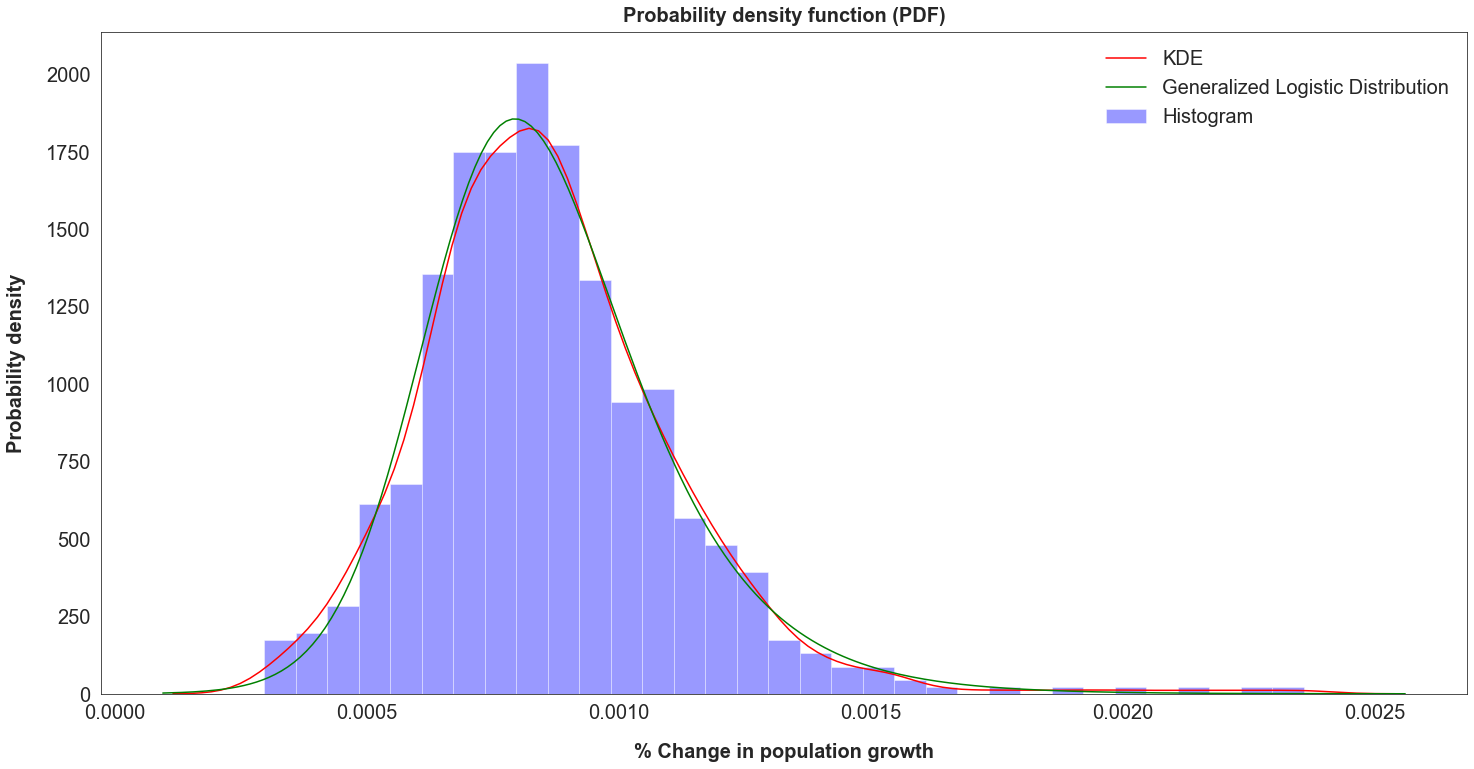

Skewness: 1.186099
Kurtosis: 4.239317


In [11]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', length = 0, pad = 10)  
plt.tight_layout()                                               

# Getting the Histogram format, KDE and fitting distribution, this is the PDF
ax = sns.distplot(pct_fix, 
                  kde_kws = {'shade': False, 'color': 'r', 'label': 'KDE'}, 
                  fit = stats.genlogistic, 
                  fit_kws = {'color': 'g', 'label': 'Generalized Logistic Distribution'},
                  hist = True, color = 'blue', label = 'Histogram')

# Fitting Generalized Logistic Distribution, same as fit = stats.genlogistic
# parameters_genlogistic = stats.genlogistic.fit(pct_fix)
# Parameters
# c, mean_genlogistic, std_genlogistic = parameters_genlogistic
# genlogistic_pdf = stats.genlogistic.pdf(pct_fix, c, mean_genlogistic, std_genlogistic)
# ax = sns.lineplot(pct_fix, genlogistic_pdf, color = 'green', 
                  # label = 'Generalized Logistic Distribution')

ax.set_title('Probability density function (PDF)', weight = 'bold', fontsize = 20, pad = 10)
ax.set_xlabel('% Change in population growth', weight = 'bold', fontsize = 20, labelpad = 20)
ax.set_ylabel('Probability density', weight = 'bold', fontsize = 20, labelpad = 20)
start, end = plt.ylim()
plt.yticks(np.arange(start, end, 250))
plt.legend(loc = 'best', prop = {'size':20}, frameon = False)
plt.show()

print('Skewness: %f' % skew(pct_fix)) 
print('Kurtosis: %f' % kurtosis(pct_fix))

<div class="alert alert-block alert-info">
<b>Decomposition of percentage change time series</b>
</div>

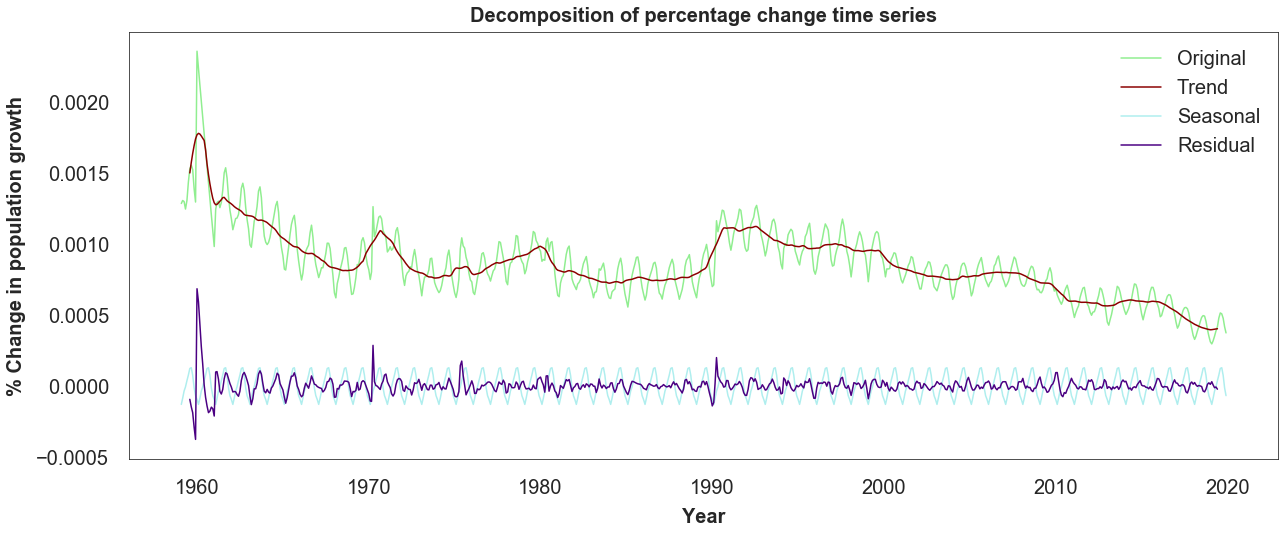

In [12]:
# Decomposition of percentage change time series
decomposition = seasonal_decompose(pct_fix)
# Trend of percentage change time series
trend = decomposition.trend
# Seasonal of percentage change time series
seasonal = decomposition.seasonal
# Residual of percentage change time series
residual = decomposition.resid

plt.figure(figsize = (20,10))
plt.title('Decomposition of percentage change time series', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('% Change in population growth', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
plt.tight_layout(pad = 10)                                               
plt.rc('font', size = 10)
plt.rc('font', weight = 'normal')
plt.plot(pct_fix, label = 'Original', color = 'lightgreen')
plt.plot(trend, label = 'Trend', color = 'darkred')
plt.plot(seasonal, label = 'Seasonal', color = 'paleturquoise')
plt.plot(residual, label = 'Residual', color = 'indigo')
plt.legend(loc = 'upper right', prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Plotting Autocorrelation and Parial Autocorrelation</b>
</div>

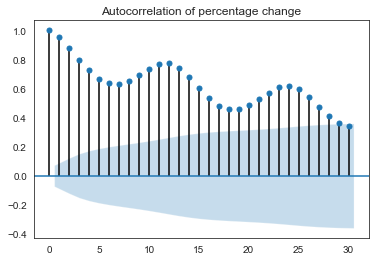

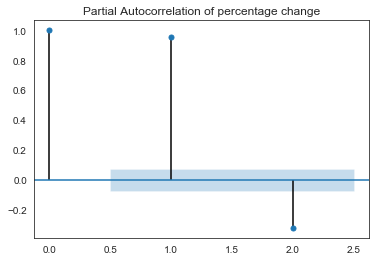

In [13]:
acf_diff = plot_acf(pct_fix, title = 'Autocorrelation of percentage change', lags = 30)

pacf_diff = plot_pacf(pct_fix,  title = 'Partial Autocorrelation of percentage change', lags = 2)

<div class="alert alert-block alert-info">
<b>Check if the time series of original and percentage change values are stationary</b>
</div>

In [14]:
result = adfuller(pct_fix)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]['5%']:
    print ('Reject Ho - Time Series is Stationary')
else:
    print ('Failed to Reject Ho - Original Time Series is Non-Stationary')

ADF Statistic: -3.551020
p-value: 0.006769
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
Reject Ho - Time Series is Stationary


<div class="alert alert-block alert-info">
<b>Create train and test data split</b>
</div>

In [15]:
y = pct_fix.copy()
y_train, y_test = train_test_split(y, test_size = 0.2, shuffle = False)

In [16]:
# Statsmodels ARIMA Method- Just a example, it's wrong
model = ARIMA(y_train, order=(3,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  584
Model:                 ARIMA(3, 1, 1)   Log Likelihood                4696.552
Date:                Mon, 24 May 2021   AIC                          -9383.104
Time:                        23:01:57   BIC                          -9361.263
Sample:                    02-01-1959   HQIC                         -9374.591
                         - 09-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1547   9.94e-20   1.56e+18      0.000       0.155       0.155
ar.L2          0.0109   1.16e-19   9.45e+16      0.000       0.011       0.011
ar.L3         -0.0582   6.18e-20  -9.41e+17      0.000      -0.058      -0.058
ma.L1          0.1484   6.64e-20   2.24e+18      0.000       0.148       0.148
sigma2      5.863e-09   6.05e-11     96.964      0.000    5.74e-09    5.98e-09
===================================================================================
Ljung-Box (Q):                      496.54   Jarque-Bera (JB):            125095.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             4.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.45e+34. Standard errors may be unstable.
"""

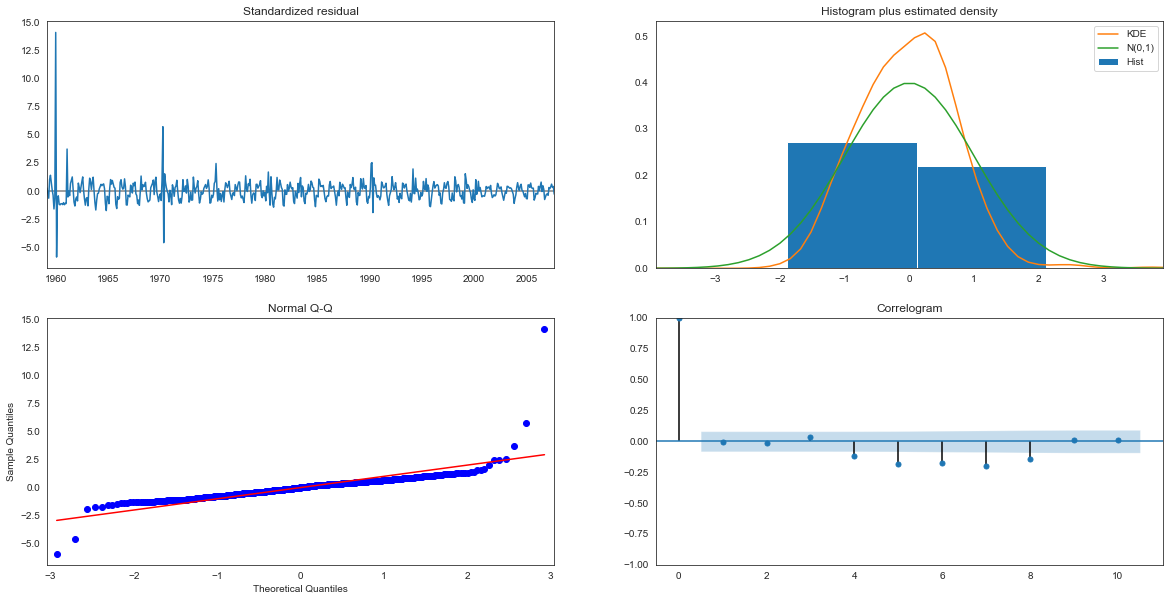

In [17]:
model_fit.plot_diagnostics(figsize=(20, 10))
plt.show()

In [18]:
# Pmd AutoARIMA Method
autoarima_model = pmd.auto_arima(y_train, start_p = 1, start_q = 1,
                           max_p = 3, max_q = 3, m = 12,
                           start_P = 0, seasonal = True,
                           d = 0, D = 0, trace = True,
                           error_action = 'ignore',  
                           suppress_warnings = True, 
                           enforce_stationarity = True,
                           stepwise = True)
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-8148.131, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-6461.988, Time=0.05 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-8632.881, Time=1.76 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=-8634.798, Time=3.50 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=-8631.603, Time=4.70 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=-8637.055, Time=4.81 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=-9417.778, Time=2.59 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  584
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                4717.734
Date:                              Mon, 24 May 2021   AIC                          -9425.468
Time:                                      23:02:47   BIC                          -9403.619
Sample:                                           0   HQIC                         -9416.952
                                              - 584                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.072e-06   3.12e-06      0.344      0.731   -5.04e-06    7.19e-06
ar.L1          0.9343   6.17e-11   1.51e+10      0.000       0.934       0.934
ar.S.L12       0.9803   7.12e-10   1.38e+09      0.000       0.980       0.980
ma.S.L12      -0.0800   1.36e-10  -5.88e+08      0.000      -0.080      -0.080
sigma2      5.069e-09   5.04e-11    100.480      0.000    4.97e-09    5.17e-09
===================================================================================
Ljung-Box (Q):                       99.05   Jarque-Bera (JB):            303519.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -6.59
Prob(H) (two-sided):                  0.00   Kurtosis:                       113.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.2e+25. Standard errors may be unstable.
"""

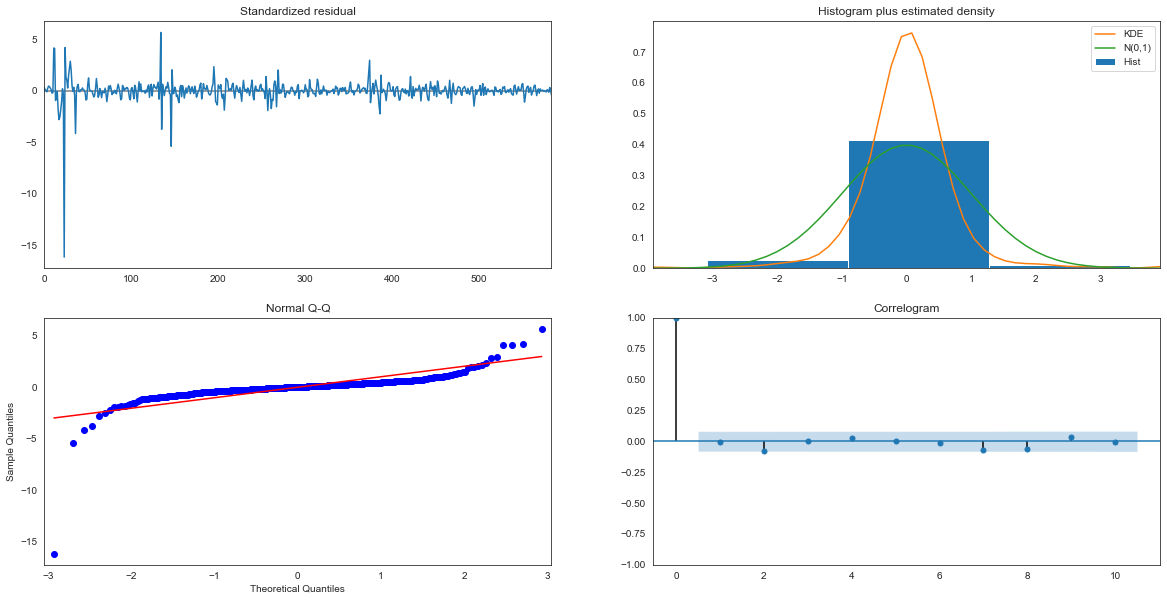

In [19]:
autoarima_model.plot_diagnostics(figsize=(20, 10))
plt.show()

<div class="alert alert-block alert-info">
<b>Predict test data and forecast</b>
</div>

In [20]:
date_predict = pd.date_range(start = '2007-10-01', end = '2025-12-01', freq = 'MS')

<div class="alert alert-block alert-info">
<b>StatsModels Way</b>
</div>

In [21]:
# Predict test and forecast data
sm_model_data = model_fit.forecast(steps = date_predict.size)
data = pd.DataFrame(sm_model_data)
data.rename(columns = {0: 'forecast'}, inplace = True)
data.tail()

,forecast
2025-08-01,0.000884
2025-09-01,0.000884
2025-10-01,0.000884
2025-11-01,0.000884
2025-12-01,0.000884


In [22]:
sm_model_data_ci = model_fit.get_forecast(steps = date_predict.size)
sm_model_data_ci = sm_model_data_ci.conf_int(alpha = 0.05)
sm_model_data_ci.tail()

,lower value,upper value
2025-08-01,-0.001946,0.003714
2025-09-01,-0.001952,0.003720
2025-10-01,-0.001959,0.003727
2025-11-01,-0.001966,0.003733
2025-12-01,-0.001972,0.003740


Root Mean Square Error: 0.0003265478270624455


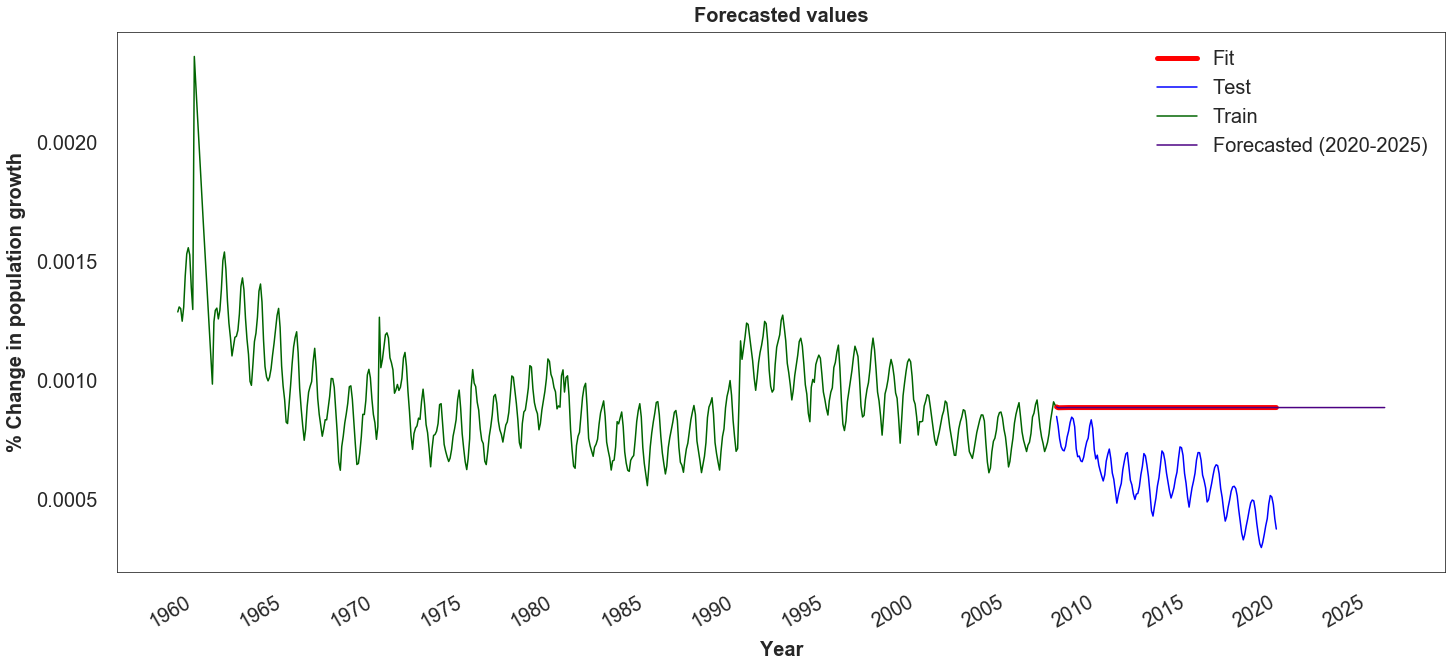

In [23]:
plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('% Change in population growth', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
plt.tight_layout()              
plt.plot(data['forecast'][y_test.index], label = 'Fit', color = 'red', linewidth = 5)
plt.plot(y_test, label = 'Test', color = 'blue')
plt.plot(y_train, label = 'Train', color = 'darkgreen')
plt.plot(data['forecast'], label = 'Forecasted (2020-2025)', color = 'indigo')
plt.legend(loc = 'best', prop = {'size':20}, frameon = False)
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5)) 
plt.gca().xaxis.set_major_formatter(date_format)

MSE = np.square(np.subtract(y_test, data['forecast'][y_test.index])).mean() 
RMSE = np.sqrt(MSE)
print('Root Mean Square Error:', RMSE)

plt.show()

In [24]:
date_forecast = pd.date_range(start = '2020-01-01', end = '2025-12-01', freq = 'MS')

<Figure size 432x288 with 0 Axes>

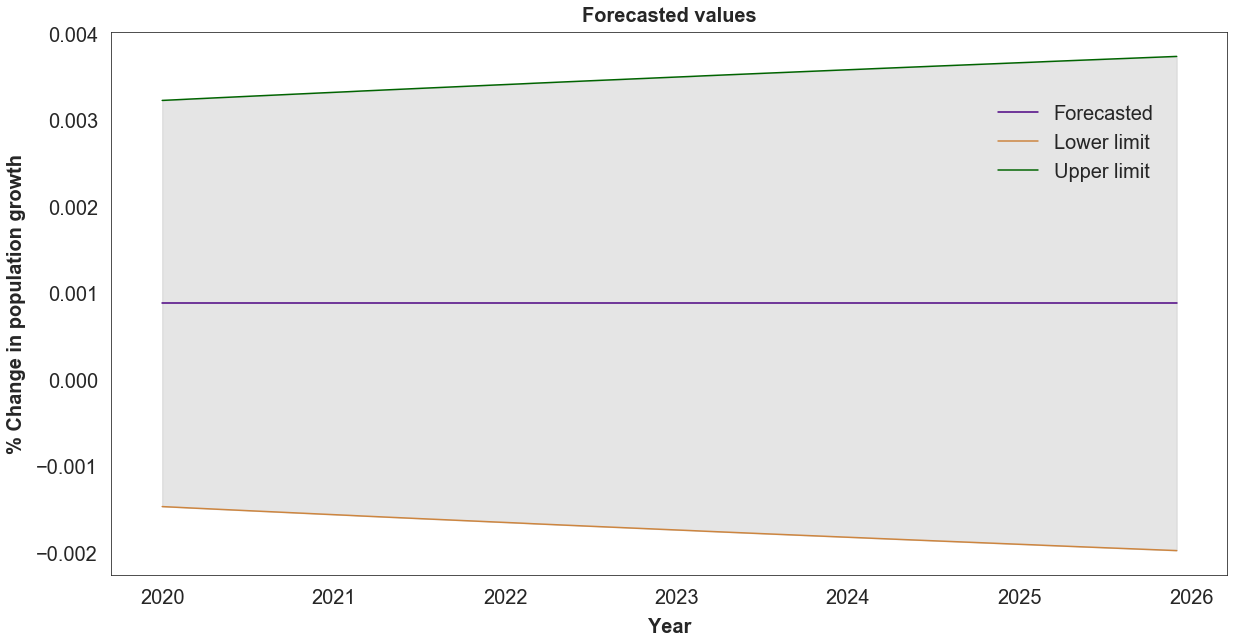

In [25]:
plt.tight_layout()     
plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('% Change in population growth', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, width = 0)                                                                               
plt.plot(data['forecast'][date_forecast], label = 'Forecasted', color = 'indigo')
plt.plot(sm_model_data_ci['lower value'][date_forecast], label = 'Lower limit', color = 'peru')
plt.plot(sm_model_data_ci['upper value'][date_forecast], label = 'Upper limit', color = 'darkgreen')
plt.fill_between(date_forecast, sm_model_data_ci['lower value'][date_forecast], 
                 sm_model_data_ci['upper value'][date_forecast], color = 'black', alpha = 0.1)
plt.legend(bbox_to_anchor = (0.95, 0, 0, 0.90), prop = {'size':20}, frameon = False)
plt.show()

<div class="alert alert-block alert-info">
<b>Pmd Way</b>
</div>

In [26]:
model_data = autoarima_model.predict(n_periods = date_predict.size, 
                                return_conf_int = True, alpha = 0.05)

forecasted = model_data[0]
lower_conf = np.hsplit(model_data[1], 2)[0].reshape(date_predict.size, 1).flatten()
upper_conf = np.hsplit(model_data[1], 2)[1].reshape(date_predict.size, 1).flatten()

In [27]:
df_all = pd.DataFrame()
df_all['predict_date'] = date_predict
# To transform in a series if needed pd.Series()
df_all['forecasted'] = forecasted
df_all['lower_conf'] = lower_conf
df_all['upper_conf'] = upper_conf
df_all.set_index('predict_date', inplace = True)
df_all = df_all[['lower_conf', 'forecasted', 'upper_conf']]
df_all.tail()

,lower_conf,forecasted,upper_conf
predict_date,,,
2025-08-01,-0.001153,0.000873,0.002899
2025-09-01,-0.001162,0.000866,0.002894
2025-10-01,-0.001204,0.000830,0.002864
2025-11-01,-0.001250,0.000790,0.002830
2025-12-01,-0.001281,0.000764,0.002808


<div class="alert alert-block alert-info">
<b>Forecast Plot</b>
</div>

Root Mean Square Error: 0.00023072703470187897


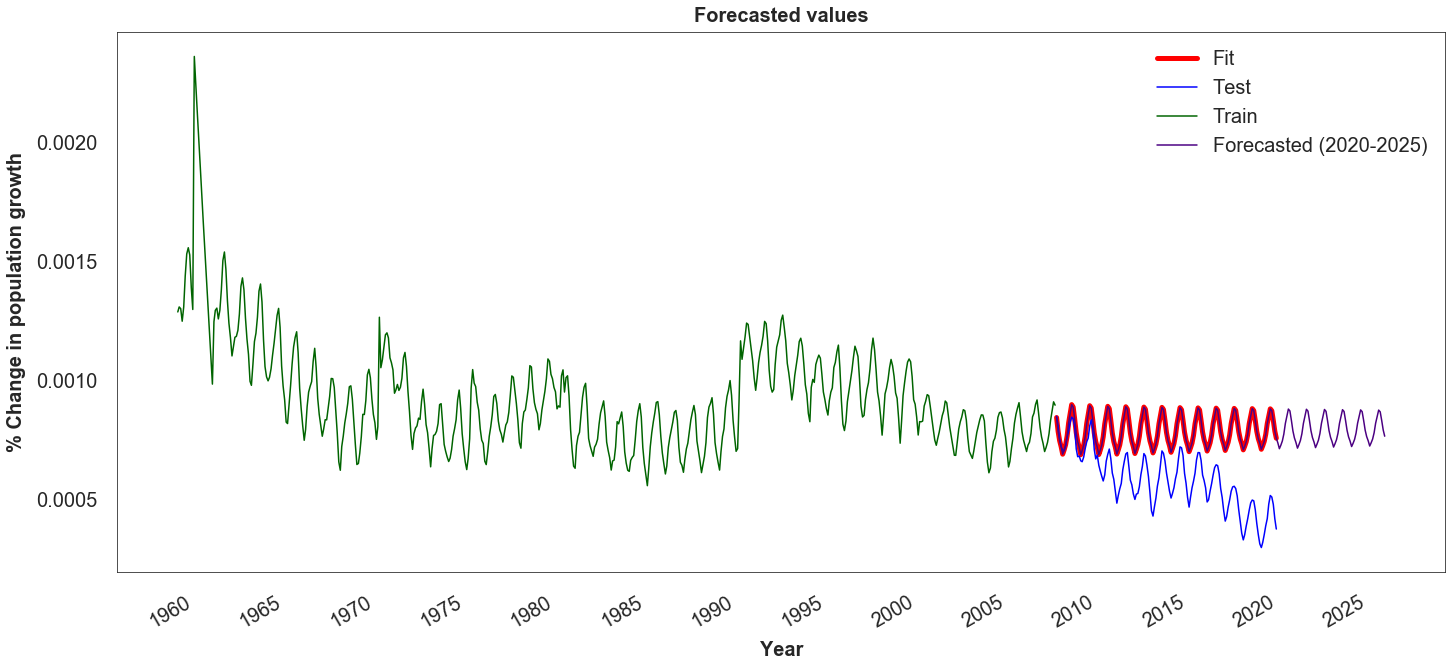

In [28]:
plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('% Change in population growth', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)                                  
plt.tight_layout()              
plt.plot(df_all['forecasted'][y_test.index], label = 'Fit', color = 'red', linewidth = 5)
plt.plot(y_test, label = 'Test', color = 'blue')
plt.plot(y_train, label = 'Train', color = 'darkgreen')
plt.plot(df_all['forecasted'], label = 'Forecasted (2020-2025)', color = 'indigo')
plt.legend(loc = 'best', prop = {'size':20}, frameon = False)
plt.gcf().autofmt_xdate()
date_format = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5)) 
plt.gca().xaxis.set_major_formatter(date_format)

MSE = np.square(np.subtract(y_test,df_all['forecasted'][y_test.index])).mean() 
RMSE = np.sqrt(MSE)
print('Root Mean Square Error:', RMSE)

plt.show()

In [29]:
date_forecast = pd.date_range(start = '2020-01-01', end = '2025-12-01', freq = 'MS')

<Figure size 432x288 with 0 Axes>

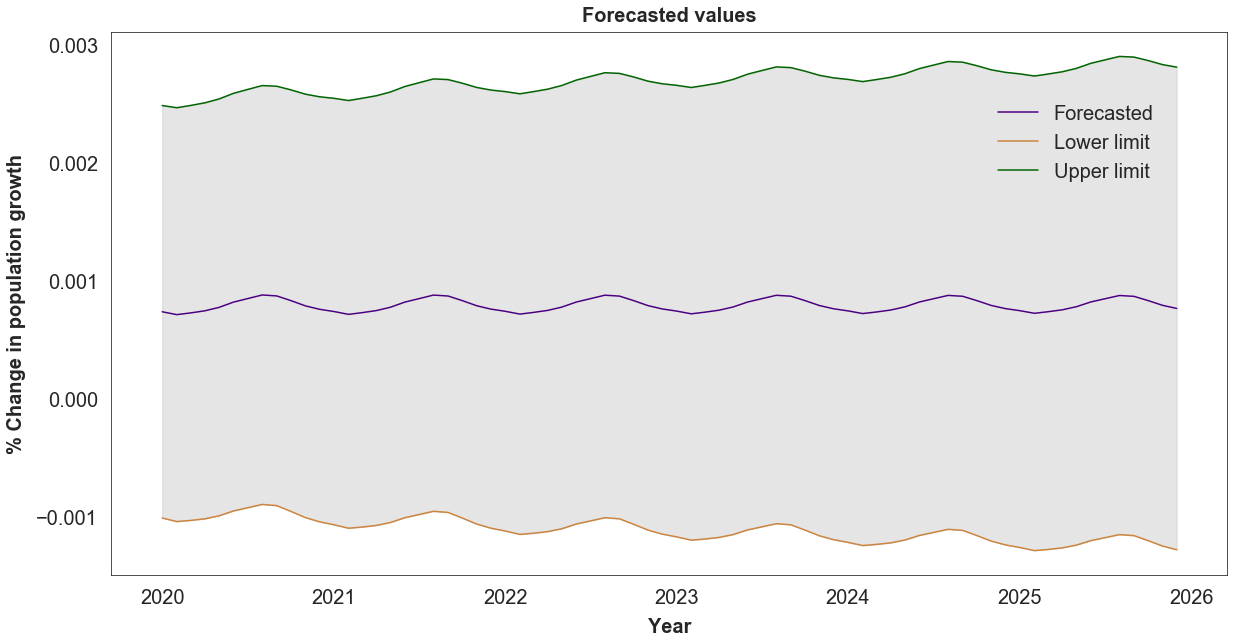

In [30]:
plt.tight_layout()     
plt.figure(figsize = (20,10))
plt.title('Forecasted values', weight = 'bold', fontsize = 20, pad = 10)
plt.xlabel('Year', weight = 'bold', fontsize = 20, labelpad = 10)
plt.ylabel('% Change in population growth', weight = 'bold', fontsize = 20, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, width = 0)                                                                               
plt.plot(df_all['forecasted'][date_forecast], label = 'Forecasted', color = 'indigo')
plt.plot(df_all['lower_conf'][date_forecast], label = 'Lower limit', color = 'peru')
plt.plot(df_all['upper_conf'][date_forecast], label = 'Upper limit', color = 'darkgreen')
plt.fill_between(date_forecast, df_all['lower_conf'][date_forecast], 
                 df_all['upper_conf'][date_forecast], color = 'black', alpha = 0.1)
plt.legend(bbox_to_anchor = (0.95, 0, 0, 0.90), prop = {'size':20}, frameon = False)
plt.show()